# Antrenarea unei retele de clasificare

Obiectivul acestui laborator este de a introduce conceptele de baza necesare antrenarii unei retele neuronale. Pytorch ofera posibilitatea de a incarca si procesa setul de date rapid si eficient. In acest laborator vom folosi setul de date CIFAR-10, pentru care vom rezolva problema de clasificare.

Importarea bibliotecilor care vor fi folosite in acest laborator:

 * *matplotlib.pyplot* pentru grafice
 * *torch.optim* pentru optimizatori
 * *torch.nn* pentru lucrul cu retele neurale
 * *torch.utils.data* pentru lucrul cu seturi de date
 * *torchvision* pentru seturi de date oferite de repository-ul Pytorch

In [28]:
from IPython import display as dspl

import time

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
import torch.nn as nn
import torch.utils.data as data
import torchvision
from PIL import Image

## Dataset (1p)
Clasa *torchvision.datasets.CIFAR10* este o subclasa a clasei abstracte *torch.utils.data.Dataset*. O astfel de clasa este folosita pentru a ingloba datasetul si pentru a returna elemente din dataset.

O clasa derivata din *torch.utils.data.Dataset*, trebuie sa suprascrie 2 metode:
 * \_\_len\_\_(self) -> aceasta metoda returneaza numarul de elemente din dataset si permite folosirea functiei __len()__ din Python.
 * \_\_getitem\_\_ -> permite folosirea operatorului de indexare din Python __[ ]__ pentru a obtine un element de la un anumit index din dataset


Exemplu clasa derivata din torch.utils.data.Dataset: https://pytorch.org/tutorials/beginner/basics/data_tutorial.html


*Obs:* Daca sunt probleme cu descarcarea dataset-ului, poti incerca si asa:

`cifar_trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=None)`

`cifar_testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=None)`

[CIFAR-10 Google Research Tutorial](https://colab.research.google.com/github/pytorch/tutorials/blob/gh-pages/_downloads/cifar10_tutorial.ipynb)

### Cerinte
  1. Printati numarul de exemple din datasetul de antrenare si de test (0.25p)
  2. Printati exemplul de la indexul 0 (0.25p)
  3. Printati valoarea maxima si valoarea minima din prima imagine din datasetul de test (0.5p)

#### Hints
 * Un exemplu din dataset este reprezentat de un tuplu care contine o imagine de tip de date PIL.Image si un int reprezentand clasa imaginii
 * np.min(a) -> returneaza minimul dintr-un obiect de tipul np.ndarray
 * np.max(a) -> returneaza maximul dintr-un obiect de tipul np.ndarray
 * np.asarray(a) -> returneaza un obiect de tipul np.ndarray. Functia trebuie sa primeaca un obiect 'array-like'

In [29]:
# Crearea instantelor pentru setul de date CIFAR de train si de test
cifar_train = torchvision.datasets.CIFAR10("./data", download=True)
cifar_test = torchvision.datasets.CIFAR10("./data", train=False)



Files already downloaded and verified


Numarul de elemente din training set: 50000
Numarul de elemente din test set: 10000
Elementul cu indexul 0:
(<PIL.Image.Image image mode=RGB size=32x32 at 0x78593A917C70>, 6)


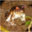

255
[255 253 235]
0
[0 0 0]


In [30]:
#TODO: Scrieti aici codul pentru cerinta numarul 1
print("Numarul de elemente din training set: %d" % len(cifar_train))
print("Numarul de elemente din test set: %d" % len(cifar_test))

#TODO: Scrieti aici codul pentru cerinta numarul 2

print("Elementul cu indexul 0:")
print(cifar_train[0]) # este o imagine cu o pisica, din categoria 6 (cat)

import cv2

display(cifar_train[0][0])

#TODO: Completati sub codul pentru cerinta numarul 3
# valorea minima si maxima
img = np.array(cifar_train[0][0])

print(img.max())
print(img.reshape(1024,3).max(axis=0))

print(img.min())
print(img.reshape(1024,3).min(axis=0))



## Iterare prin Dataset (1p)

Deoarece clasa datasetului implementeaza functia \_\_getitem\_\_(), se poate itera prin dataset cum se poate itera si printr-o lista sau alt obiect iterabil.

### Cerinte
 * Odata la n pasi, printati clasa exemplului curent si afisati imaginea.

#### Hints
  * A fost importata libraria matplotlib.pyplot as plt
  * Functia plt.figure(figsize=(float, float)) returneaza o figura de dimensiunea oferita ca parametru in *figsize*
  * Functia plt.imshow(np.ndarray) plaseaza o imagine pe o figura
  * Functia plt.show() afiseaza figura

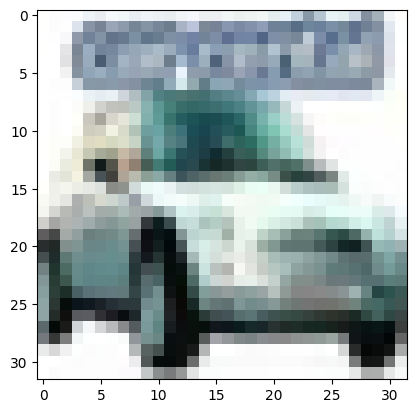

In [33]:
n = 10000

for idx, example in enumerate(cifar_train):
  if idx % n == 0:
    # Aceasta functie sterge ce a fost afisat pana la momentul curent
    dspl.clear_output(wait=True)

    #TODO: Completati codul aici si afisati cateva imagini din dataset
    plt.imshow(example[0])
    plt.show()
    # Aceasta functie opreste procesul pentru 2 secunde
    time.sleep(2)

## DataLoader (1p)

In torch.utils.data este definita clasa *DataLoader*. Aceasta este un wrapper peste o clasa de tip Dataset si este folosita pentru a abstractiza procesarea pe mai mult threaduri, concatenarea exemplelor in batch-uri, si extragerea exemplelor in mod aleatoriu din dataset.

Pentru a crea un obiect de tip *DataLoader* se foloseste constructorul care are urmatorul header:

  \_\_init\_\_(dataset_object, batch_size=1, shuffle=False, num_workers=0, collate_fn=None)

 * dataset_object - obiectul de tip Dataset care va fi inglobat
 * batch_size - dimensiunea batch-ului care va fi returnat
 * shuffle - determina daca exemplele vor fi extrase aleatoriu sau nu
 * num_workers - numarul de procese paralele care vor incarca datele
 * collate_fn - o functie care face preprocesari pe N elemente returnate de obiectul de tip Dataset si le concateneaza intr-un batch. N = batch_size

Clasa DataLoader implementeaza si functia *\_\_len\_\_()* pentru a returna numarul de batch-uri din dataset.

Obiectul de tip Dataset creat anterior returneaza un tuple-uri care contin o imagine de tip PIL.Image si clasa imaginii de tip int. O retea neurala din Pytorch opereaza pe tipul de date torch.Tensor. Prin urmare obiectul de tip DataLoader trebuie sa returneze obiecte de tip torch.Tensor

### Cerinte
  1. Iterati prin cele doua obiecte de tip DataLoader si printati doar primul element. (0.5p)
  2. Printati shape-ul celor 2 tensori  doar pentru primul element (0.5p)

#### Hints
  * functia __to_tensor__ din *torchvision.transforms.functional* creaza un obiect de tip torch.Tensor dintr-un obiect de tip PIL.Image
  * functia __torch.tensor__ creaza un obiect de tip torch.Tensor dintr-un obiect de tip np.ndarray
  * functia __unsqueeze()__ din clasa torch.Tensor creaza o noua dimensiune intr-un tensor. Aceasta este echivalentul functiei __expand_dims()__ din numpy. Exemplu: Daca avem un obiect de tip torch.Tensor, *t*, care contine un vector cu 10 elemente (shape [10]), *t.unsqueeze(0)* va returna un boiect cu aceleasi valori dar cu shape-ul [1, 10]
  * functia __torch.cat(tensors, dim=0)__ primeste o lista de tensori si ii concateneaza de-a lungul dimensiunii *dim*. Exemplu: functia primeste o lista cu doi vectori cu shape-ul [1, 10] si *dim=0*, rezultatul are shape-ul [2, 10] (batch 2 ?). Daca *dim=1*, rezultatul va fi [1, 20]. Echivalentul numpy este functia __concatenate()__
  * functia __size()__ din clasa torch.Tensor returneaza shape-ul tensorului

In [36]:
from torchvision.transforms.functional import to_tensor

def preproc_fn(examples):
  """
    Functia primeste un batch de exemple pe care trebuie sa le transforme in tensori
      si sa le puna intr-un batch de tip torch.Tensor.
  """
  processed_images = []
  processed_labels = []

  print(processed_images)

  for example in examples: # example este un tuplu returnat de obiectul de tip Dataset
    pil_image = example[0]
    #pil_image_array = np.asarray(pil_image)

    tensor_image = to_tensor(pil_image)  # Transforma in obiect de tip torch.Tensor imaginea din example -> 32 x 32 x 3
    tensor_image = tensor_image.unsqueeze(0) # Adauga inca o dimensiune la inceputul imaginii -> 1 x 32 x 32 x 3
    processed_images.append(tensor_image)

    label = np.array([example[1]])# Creaza un obiect de tip np.ndarray din labelul exemplului
    tensor_label = torch.Tensor(label)# Creaza un obiect de tip torch.Tensor din label
    tensor_label = tensor_label.unsqueeze(0) # Adauga inca o dimensiune la incepului labelului
    processed_labels.append(tensor_label)

  torch_images = torch.cat(processed_images,  dim=0)
  torch_labels = torch.cat(processed_labels, dim=0)

  return torch_images, torch_labels

loader1 = data.DataLoader(cifar_train, batch_size=1000, shuffle=True, collate_fn=preproc_fn)

print("Datasetul contine {} de batch-uri".format(len(loader1)))

loader2 = data.DataLoader(cifar_train, batch_size=1000, shuffle=True, num_workers=2, collate_fn=preproc_fn)

start = time.time()

for index, batch in enumerate(loader1):
#TODO: Cerintele 1 si 2 - Iterati prin loader1 si printati doar primul element si shape-ul celor 2 tensori din exemplu
  if index == 0:
      print("Shape imagini:", batch[0].size())
      print("Shape labeluri", batch[1].size())


end = time.time()
print("Iterarea prin dataset cu worker-ul pe procesul curent dureaza {} secunde".format(end - start))

start = time.time()

for index, batch in enumerate(loader2):
#TODO: Cerintele 1 si 2 - Iterati prin loader2 si printati doar primul element si shape-ul celor 2 tensori din exemplu
  if index == 0:
      print("Shape imagini", batch[0].size())
      print("Shape labeluri", batch[1].size())


end = time.time()
print("Iterarea prin dataset cu 2 worker-i pe procese diferinte dureaza {} secunde".format(end - start))

Datasetul contine 50 de batch-uri
[]
Shape imagini: torch.Size([1000, 3, 32, 32])
Shape labeluri torch.Size([1000, 1])
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
Iterarea prin dataset cu worker-ul pe procesul curent dureaza 10.102158784866333 secunde
[]
[]
[]
[]
Shape imagini torch.Size([1000, 3, 32, 32])
Shape labeluri torch.Size([1000, 1])
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[][]

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
Iterarea prin dataset cu 2 worker-i pe procese diferinte dureaza 10.022784948348999 secunde


## Definirea unei retele cu un singur layer

Modulul *torch.nn* contine clase si functii utilitare pentru crearea retelelor neurale. Pentru a crea o retea neurala se va defini o clasa, *SingleLayerNet* ce mosteneste din clasa *torch.nn.Module*. Clasele din Pytorch ce definesc straturi, functii de activare, si functii cost mostenesc din clasa *torch.nn.Module*. Aceste clase implementeaza metoda **forward()** care este folosita pentru a defini ce se intampla la un forward pass. Aceasta metoda este apelata in metoda __\_\_call\_\_()__ a clasei.

Clasa *Linear* din *torch.nn*, ce mosteneste din *nn.Module* defineste un strat 'fully-connected'. Contructorul primeste 3 parametrii:
 * Dimensiunea vectorului de intrare
 * Dimensiunea vectorului de iesire
 * Daca sa se foloseasca *bias* sau nu

Clasa Simgoid din *torch.nn* , ce mosteneste din *nn.Module*, defineste o functie de activare sigmoid.

### Cerinte
  1. In constructorul clasei *SingleLayerNet* definiti un atribut care sa contina un obiect de tip *nn.Linear*
  2. In constructorul clase *SingleLayerNet* definiti un atribut care sa contina un obiect de tip *nn.Sigmoid*
  3. In metoda __forward()__ definiti o variabila care sa contina iesirea stratului linear aplicat pe intrarea 'x'.
  4. In metoda __forward()__ definiti o variabila care sa contina iesirea functiei de activare sigmoid aplicata pe iesirea stratului linear si returnati aceasta variabila

#### Hint
 * Imaginea de intrare are dimensiune 32x32x3 (inaltime x latime x canale). Vectorul de intrare in retea va avea dimensiune 3072.

#### Atentie
 * Dimensiunea de iesire a stratului trebuie sa fie de aceeasi marime cu numarul de clase.

In [ ]:
### Exemplu utilizare metoda __call__()
class A(object):
  def __init__(self):
    self.a ='A'

  def __call__(self, mesaj):
    print(self.a, mesaj)

obj = A()
obj("OK!")

A OK!


In [ ]:
import torch.nn as nn

class SingleLayerNet(nn.Module):

  def __init__(self):
    super(SingleLayerNet, self).__init__()


    self.linear1 = nn.Linear(3072, 10, bias=False)
    self.activation1 = nn.Sigmoid()

  def forward(self, x: torch.Tensor):
    return self.activation1(self.linear1(x))


# Definirea unei retele cu doua straturi (layere). (2p)

### Cerinte
  1. In constructorul clasei *TwoLayerNet* definiti doua atribute care sa contina doua obiecte de tip *nn.Linear*. (0.5p)
  2. In constructorul clasei *TwoLayerNet* definiti un atribut care sa contina un obiect de tip *nn.Sigmoid* (se poate folosi acelasi obiect de tip *nn.Sigmoid* pentru activarea ambelor straturi *nn.Linear*) (0.5p)
  3. Implementati metoda **forward()** similar cu exercitul anterior (layer1->activation->layer2->activation). (1p)



In [ ]:
class TwoLayerNet(nn.Module):

  def __init__(self):
    super(TwoLayerNet, self).__init__()
    # Cerinta 1 - completati codul aici
    self.linear1 = nn.Linear(3072, 1536 )
    self.linear2 = nn.Linear(1536, 10)

    # Cerinta 2 - definirea unui obiect de tip nn.Sigmoid
    self.activation = nn.Sigmoid()

  def forward(self, x):
      # Cerinta 3 si 4 - Implementarea metodei forward
      # Aplicarea primului strat liniar urmat de activare
      x = self.linear1(x)
      x = self.activation(x)

      # Aplicarea celui de-al doilea strat liniar urmat de activare
      x = self.linear2(x)
      x = self.activation(x)

      return x


## Preprocesare pentru retele cu straturi 'fully-connected' (2.5 p)

Avand o retea cu straturi 'fully-connected' este necesar ca imaginea sa fie redimensionata intr-un vector. Clasa *torch.Tensor* defineste metoda __view()__ care returneaza un tensor redimensionat.

### Cerinte
  1. Completati functia de mai jos pentru a redimensiona imaginea intr-un vector. (1p)
  2. Extrageti un batch din DataLoader-ul de antrenare si printati dimensiunile imaginii. (1.5p)

In [ ]:
# Varianta numpy
img1 = np.random.rand(32, 32, 3)
img2 = np.random.rand(32, 32, 3)

print(img1.shape, img2.shape)

reshaped1 = img1.reshape(-1)
reshaped2 = img2.reshape(32*32*3)

print(reshaped1.shape, reshaped2.shape)

(32, 32, 3) (32, 32, 3)
(3072,) (3072,)


In [ ]:
from torchvision.transforms.functional import normalize

def preproc_liniarized_fn(examples):
  processed_images = []
  processed_labels = []

  for example in examples:
    tensor_image = to_tensor(example[0])
    # In linia de mai jos imaginea este normalizata astfel incat sa aiba toate valorile in
    # [-1, 1] in loc de [0, 255]
    normalized_tensor_image = normalize(tensor_image, [0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    #TODO: Cerinta 1 - completati codul aici
    vector_image = normalized_tensor_image.reshape(-1)
    vector_image = vector_image.unsqueeze(0)
    processed_images.append(vector_image)

    label = np.array(example[1])
    tensor_label = torch.tensor(label)
    tensor_label = tensor_label.unsqueeze(0)
    processed_labels.append(tensor_label)

  torch_images = torch.cat(processed_images, dim=0)
  torch_labels = torch.cat(processed_labels, dim=0)

  return torch_images, torch_labels

batch_size = 100

train_loader = data.DataLoader(cifar_train, batch_size=batch_size, shuffle=True, num_workers=2, collate_fn=preproc_liniarized_fn)
test_loader = data.DataLoader(cifar_test, batch_size=1, shuffle=False, collate_fn=preproc_liniarized_fn)

#TODO: Cerinta 2 - completati codul aici
images, labels = next(iter(train_loader))
print(images[0].size())



torch.Size([3072])


## Definirea antrenarii

Pentru definirea antrenarii avem urmatorii pasi:
 * Definirea numarului de epoci (de cate ori parcurgem intregul dataset)
 * Definirea obiectului de tip *SingleLayerNet*
 * Definirea optimizatorului. Vom folosi Stochastic Gradient Descent (SGD) pentru optimizarea retelei, prin urmare definim un obiect de tip *optim.SGD*. Constructorul acestei clase primeste parametrii pe care trebuie sa-i optimizeze (single_layer_net.parameters()) si rata de invatare (lr=1e-2)
 * Definim functia cost de tip *nn.CrossEntropyLoss()*
 * Definim functa care parcurge datasetul si antreneaza reteaua.

In [ ]:
import torch.optim as optim

# Definim numarul de epoci
epochs = 10

# Definim reteaua
single_layer_net = SingleLayerNet()

# Definim optimizatorul
optimizer = optim.SGD(single_layer_net.parameters(), lr=1e-2)
# Dupa definirea optimizatorului si dupa fiecare iteratie trebuie apelata functia zero_grad().
# Aceasta face toti gradientii zero.
optimizer.zero_grad()

# Definim functia cost
loss_fn = nn.CrossEntropyLoss()

def train_fn(epochs: int, train_loader: data.DataLoader, test_loader: data.DataLoader,
             net: nn.Module, loss_fn: nn.Module, optimizer: optim.Optimizer):
  # Iteram prin numarul de epoci
  for e in range(epochs):
    # Iteram prin fiecare exemplu din dataset
    for images, labels in train_loader:

      # Aplicam reteaua neurala pe imaginile de intrare
      out = net(images)
      # Aplicam functia cost pe iesirea retelei neurale si pe adnotarile imaginilor
      loss = loss_fn(out, labels)
      # Aplicam algoritmul de back-propagation
      loss.backward()
      # Facem pasul de optimizare, pentru a aplica gradientii pe parametrii retelei
      optimizer.step()
      # Apelam functia zero_grad() pentru a uita gradientii de la iteratie curenta
      optimizer.zero_grad()

    print("Loss-ul la finalul epocii {} are valoarea {}".format(e, loss.item()))

    # Calculul acuratetii
    count = len(test_loader)
    correct = 0

    for test_image, test_label in test_loader:
      out_class = torch.argmax(net(test_image))
      if out_class == test_label:
        correct += 1

    print("Acuratetea la finalul epocii {} este {:.2f}%".format(e, (correct / count) * batch_size))

## Antrenam propria retea

In [ ]:
train_fn(epochs, train_loader, test_loader, single_layer_net, loss_fn, optimizer)

Loss-ul la finalul epocii 0 are valoarea 2.1121490001678467
Acuratetea la finalul epocii 0 este 31.89%
Loss-ul la finalul epocii 1 are valoarea 2.128678798675537
Acuratetea la finalul epocii 1 este 33.15%
Loss-ul la finalul epocii 2 are valoarea 2.084689140319824
Acuratetea la finalul epocii 2 este 34.04%
Loss-ul la finalul epocii 3 are valoarea 2.0259385108947754
Acuratetea la finalul epocii 3 este 34.41%
Loss-ul la finalul epocii 4 are valoarea 2.072725772857666
Acuratetea la finalul epocii 4 este 34.66%
Loss-ul la finalul epocii 5 are valoarea 2.092447280883789
Acuratetea la finalul epocii 5 este 35.07%
Loss-ul la finalul epocii 6 are valoarea 2.050827741622925
Acuratetea la finalul epocii 6 este 35.36%
Loss-ul la finalul epocii 7 are valoarea 2.06080961227417
Acuratetea la finalul epocii 7 este 35.35%
Loss-ul la finalul epocii 8 are valoarea 2.059269905090332
Acuratetea la finalul epocii 8 este 35.42%
Loss-ul la finalul epocii 9 are valoarea 2.021517038345337
Acuratetea la finalul 

## Definirea unei retele cu 2 straturi si antrenarea ei (2.5 p)

### Cerinte
 1. Instantiati un obiect de tip *TwoLayerNet*. (0.5p)
 2. Definiti un optimizator pentru antrenarea acestei retele (1p)
 3. Folositi functia deifnita mai sus pentru a antrena aceasta retea (*train_fn*). (1p)

#### Atentie
 * Dimensiunea de iesire a primului strat trebuie sa se potriveasca cu dimensiunea de intrare a celui de-al doilea.

In [ ]:
#TODO: Cerinta 1 - completati codul aici

# Instantierea retelei
two_layer_net = TwoLayerNet()

#TODO: Cerinta 2 - completati codul aici
optimizer2 = optim.SGD(two_layer_net.parameters(), lr=1e-2)

# Dupa definirea optimizatorului si dupa fiecare iteratie trebuie apelata functia zero_grad().
# Aceasta face toti gradientii zero.
optimizer2.zero_grad()

# Definim functia de cost
loss_fn2 = nn.CrossEntropyLoss()

#TODO: Cerinta 3 - Antrenati reteaua
train_fn(15, train_loader, test_loader, two_layer_net, loss_fn2, optimizer2)

Loss-ul la finalul epocii 0 are valoarea 2.2570111751556396
Acuratetea la finalul epocii 0 este 21.31%
Loss-ul la finalul epocii 1 are valoarea 2.2018206119537354
Acuratetea la finalul epocii 1 este 24.70%
Loss-ul la finalul epocii 2 are valoarea 2.1867387294769287
Acuratetea la finalul epocii 2 este 26.30%
Loss-ul la finalul epocii 3 are valoarea 2.1816418170928955
Acuratetea la finalul epocii 3 este 28.23%
Loss-ul la finalul epocii 4 are valoarea 2.176706314086914
Acuratetea la finalul epocii 4 este 29.44%
Loss-ul la finalul epocii 5 are valoarea 2.1309092044830322
Acuratetea la finalul epocii 5 este 29.95%
Loss-ul la finalul epocii 6 are valoarea 2.1390109062194824
Acuratetea la finalul epocii 6 este 30.02%
Loss-ul la finalul epocii 7 are valoarea 2.1109142303466797
Acuratetea la finalul epocii 7 este 30.53%
Loss-ul la finalul epocii 8 are valoarea 2.1086249351501465
Acuratetea la finalul epocii 8 este 31.17%
Loss-ul la finalul epocii 9 are valoarea 2.06999135017395
Acuratetea la fi

In [ ]:

optimizer3 = optim.SGD(two_layer_net.parameters(), lr=0.01)
optimizer3.zero_grad()
train_fn(10, train_loader, test_loader, two_layer_net, loss_fn2, optimizer2)

Loss-ul la finalul epocii 0 are valoarea 2.0901906490325928
Acuratetea la finalul epocii 0 este 32.63%
Loss-ul la finalul epocii 1 are valoarea 2.0510544776916504
Acuratetea la finalul epocii 1 este 33.22%
Loss-ul la finalul epocii 2 are valoarea 2.0770018100738525
Acuratetea la finalul epocii 2 este 33.36%
Loss-ul la finalul epocii 3 are valoarea 2.070101499557495
Acuratetea la finalul epocii 3 este 33.36%
Loss-ul la finalul epocii 4 are valoarea 2.0822157859802246
Acuratetea la finalul epocii 4 este 33.32%
Loss-ul la finalul epocii 5 are valoarea 2.0479207038879395
Acuratetea la finalul epocii 5 este 33.43%
Loss-ul la finalul epocii 6 are valoarea 2.075920820236206
Acuratetea la finalul epocii 6 este 33.61%
Loss-ul la finalul epocii 7 are valoarea 2.053525447845459
Acuratetea la finalul epocii 7 este 33.73%
Loss-ul la finalul epocii 8 are valoarea 2.0485353469848633
Acuratetea la finalul epocii 8 este 33.90%
Loss-ul la finalul epocii 9 are valoarea 2.0876076221466064


KeyboardInterrupt: 

## Crearea dinamica a unei retele

In  *torch.nn* exista clasa *Sequential* care primeste o lista de straturi si functii de activare in ordinea in care trebuie aplicate, e.g. [linear, sigmoid, linear, sigmoid]. Rezultatul este inlantuirea acestor straturi si functii de activare.


In [ ]:
class Net(nn.Module):

  def __init__(self, layer_sizes: list, activation: type):
    """
      Constructor.

      :param layer_sizes - Parametru de tip lista care contine dimensiunile fiecarui strat din retea
      :param activation - Parametru de tip type. Poate fi nn.Sigmoid, nn.Tanh, nn.ReLU. Adica clasa pentru a instantia mai tarziu
    """
    super(Net, self).__init__()

    layers = []

    for i in range(0, len(layer_sizes)):
      inl, out = layer_sizes[i]
      layers.append(nn.Linear(inl, out))
      layers.append(activation)

    self.net = nn.Sequential(*layers)

  def forward(self, x: torch.Tensor):
    return self.net(x)

## [BONUS] Antrenarea retelei cu N straturi (2p)

Mai jos functia de antrenare a fost modificata pentru a afisa modificarile parametrilor retelei in timpul antrenarii. Aceasta se obtine prin implementarea functiei __plot_weights()__.

### Cerinte

  1. Creati un obiect de tipul *Net* (0.25)
  2. Creati un optimizator pentru reteaua de tipul *Net* (0.25)
  3. Antrenati reteaua folosind functia __plotting_train_fn()__ (0.25)
  4. Experimentati cu retele straturi si functii de activare diferite (0.75)
  5. Modificati celula de mai jos si scrieti o functie numita __plot_loss()__ pentru a afisa un grafic care arata evolutia rezultatului functiei cost in timp. Faceti acelasi lucru si pentru acuratete. (0.5)

Loss-ul la finalul epocii 0 are valoarea 2.3015451431274414
Acuratetea la finalul epocii 0 este 10.00%


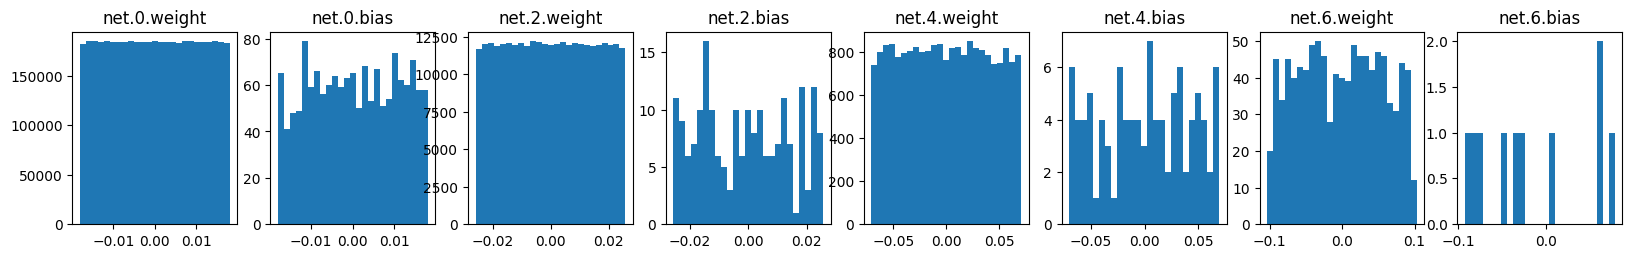

Loss-ul la finalul epocii 1 are valoarea 2.3033788204193115
Acuratetea la finalul epocii 1 este 10.00%


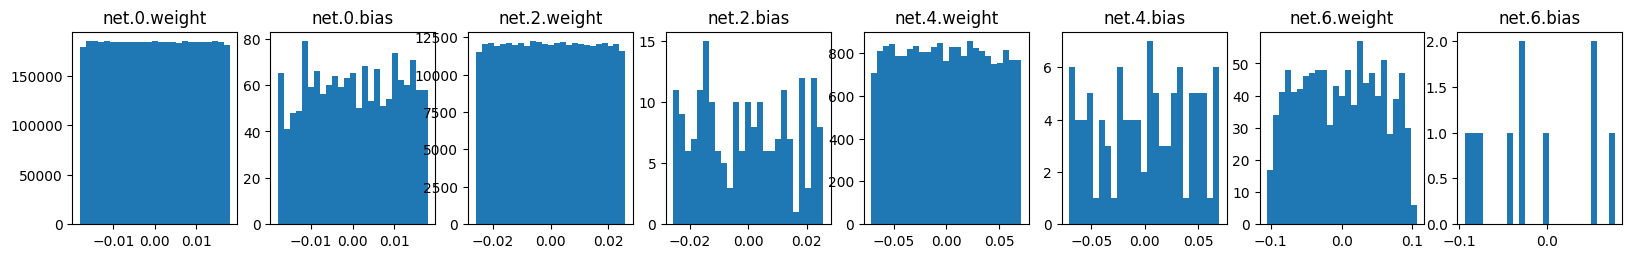

Loss-ul la finalul epocii 2 are valoarea 2.3024697303771973
Acuratetea la finalul epocii 2 este 10.00%


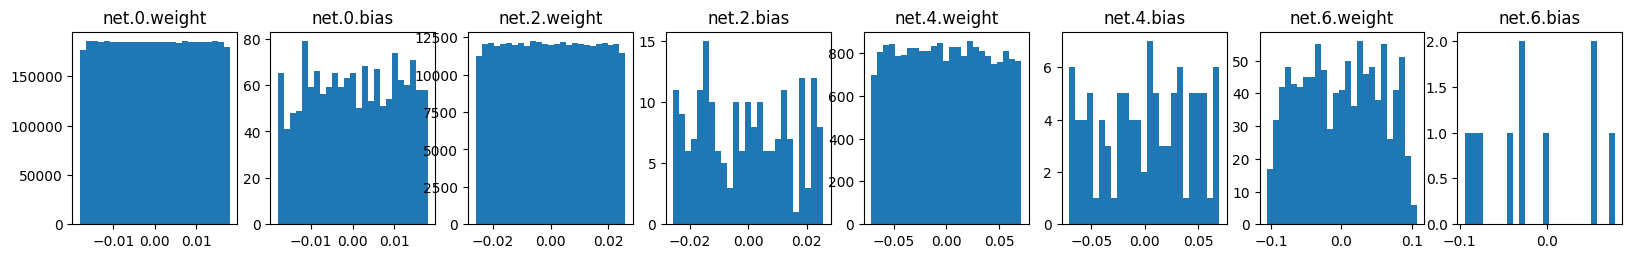

Loss-ul la finalul epocii 3 are valoarea 2.3021810054779053
Acuratetea la finalul epocii 3 este 10.00%


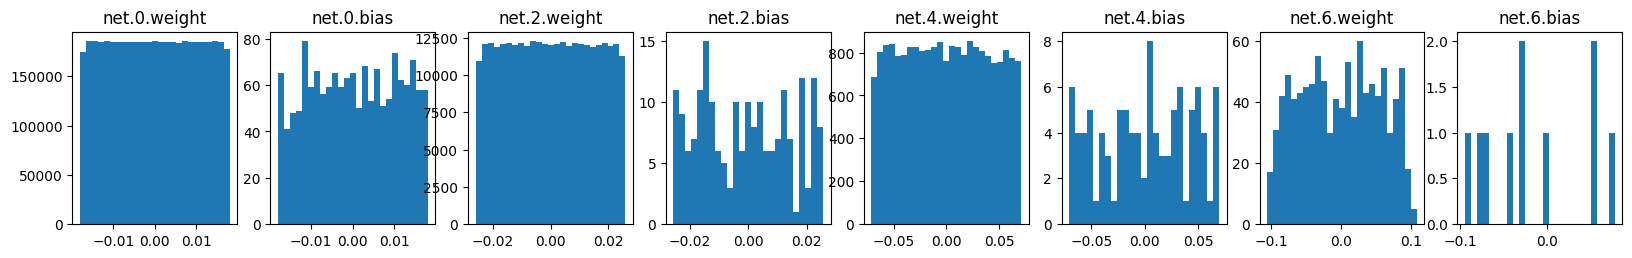

Loss-ul la finalul epocii 4 are valoarea 2.303001880645752
Acuratetea la finalul epocii 4 este 11.34%


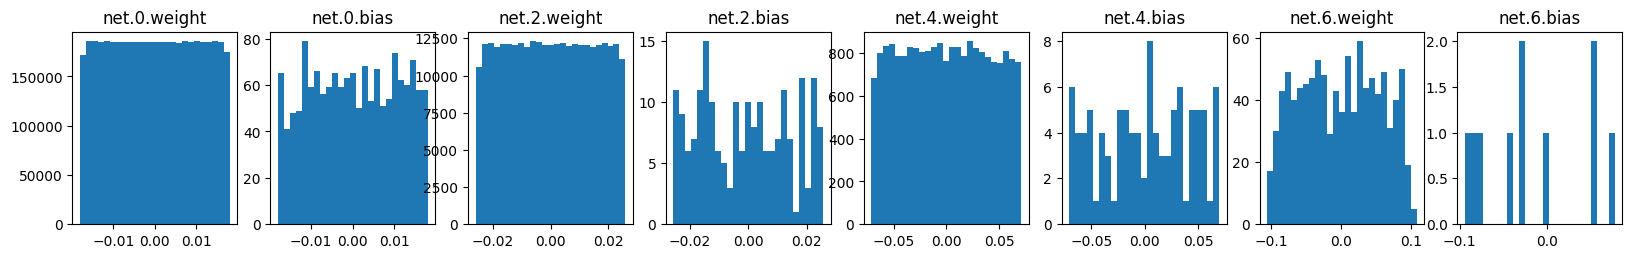

Loss-ul la finalul epocii 5 are valoarea 2.3025519847869873
Acuratetea la finalul epocii 5 este 10.10%


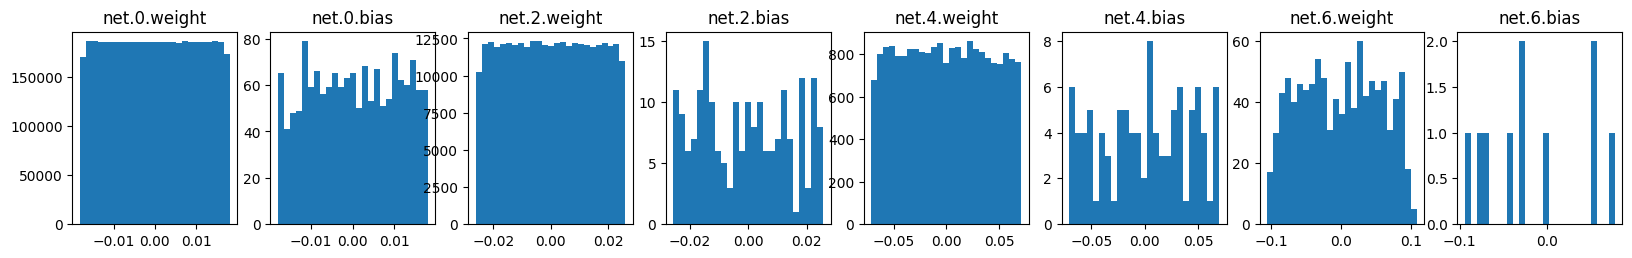

Loss-ul la finalul epocii 6 are valoarea 2.3024890422821045
Acuratetea la finalul epocii 6 este 12.15%


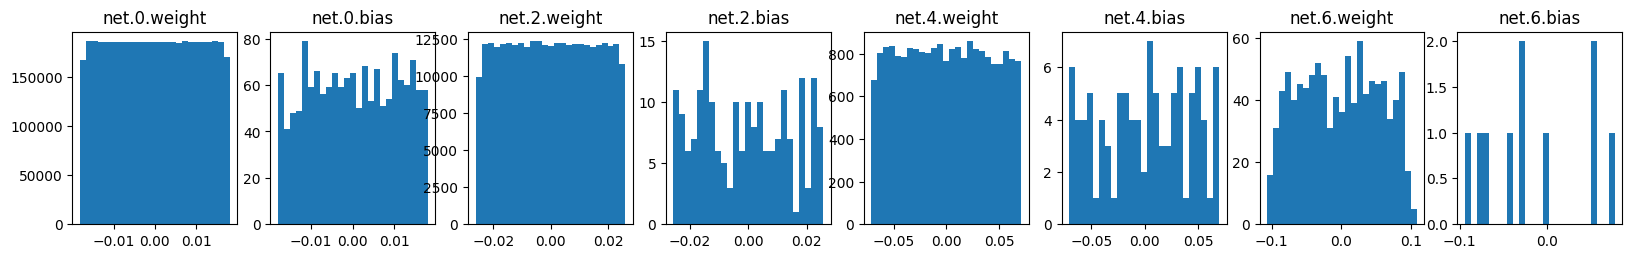

Loss-ul la finalul epocii 7 are valoarea 2.3024795055389404
Acuratetea la finalul epocii 7 este 10.00%


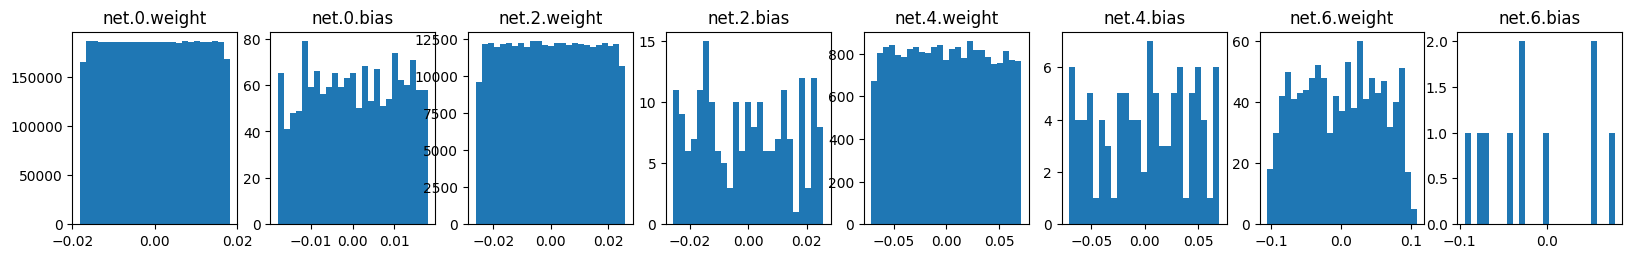

Loss-ul la finalul epocii 8 are valoarea 2.302510976791382
Acuratetea la finalul epocii 8 este 10.00%


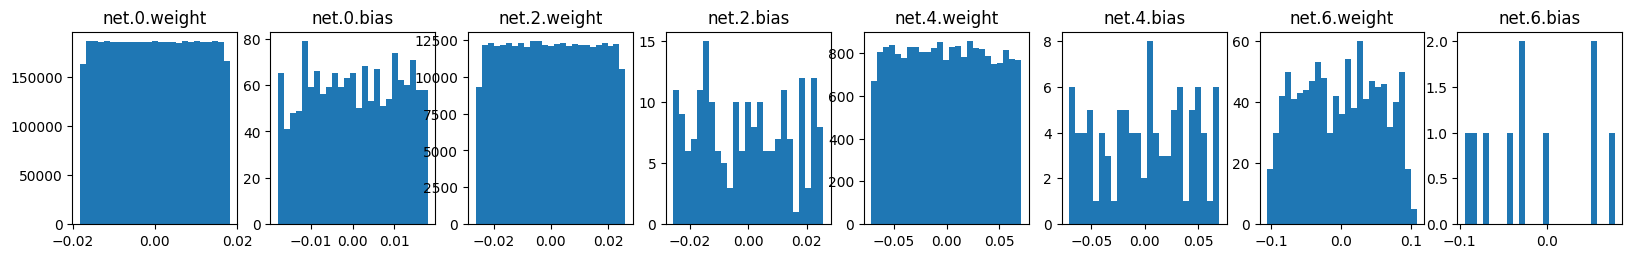

Loss-ul la finalul epocii 9 are valoarea 2.3026487827301025
Acuratetea la finalul epocii 9 este 10.00%


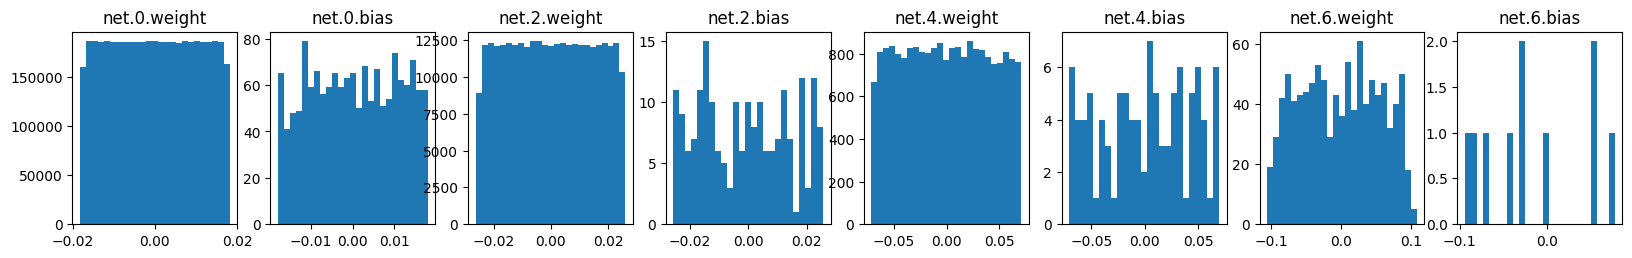

In [ ]:
def plot_weights(net: nn.Module):
  named_params = net.named_parameters()
  np_params = []
  np_param_names = []
  for name, param in named_params:
    np_params.append(param.clone().detach().view(-1).numpy())
    np_param_names.append(name)

  fig = plt.figure(figsize=(20, 2.5))

  count = len(np_param_names)
  for i in range(count):
    plt.subplot(1, count, i+1)
    plt.hist(np_params[i], bins=25)
    plt.title(np_param_names[i])
  plt.show()


def plotting_train_fn(epochs: int, train_loader: data.DataLoader, test_loader: data.DataLoader,
             net: nn.Module, loss_fn: nn.Module, optimizer: optim.Optimizer):
  for e in range(epochs):
    for images, labels in train_loader:
      optimizer.zero_grad()
      out = net(images)
      loss = loss_fn(out, labels)
      loss.backward()
      optimizer.step()


    print("Loss-ul la finalul epocii {} are valoarea {}".format(e, loss.item()))

    count = len(test_loader)
    correct = 0

    for test_image, test_label in test_loader:
      out_class = torch.argmax(net(test_image))
      if out_class == test_label:
        correct += 1

    print("Acuratetea la finalul epocii {} este {:.2f}%".format(e, (correct / count) * 100))
    plot_weights(net)

# Cerinta 1 - completati codul aici
layer_sizes = [(3072, 1500), (1500, 200),(200, 100), (100, 10)]
multiLayer = Net(layer_sizes, nn.Sigmoid())
# Cerinta 2 - completati codul aici
optimizer3 = optim.SGD(multiLayer.parameters(), lr=1e-2)
optimizer3.zero_grad()

# Cerinta 3 - completati codul aici
loss_fn = nn.CrossEntropyLoss()
plotting_train_fn(10, train_loader, test_loader, multiLayer, loss_fn, optimizer3)





In [ ]:
def plotting_train_fn(epochs: int, train_loader: data.DataLoader, test_loader: data.DataLoader,
             net: nn.Module, loss_fn: nn.Module, optimizer: optim.Optimizer):
  for e in range(epochs):
    for images, labels in train_loader:
      optimizer.zero_grad()
      out = net(images)
      loss = loss_fn(out, labels)
      loss.backward()
      optimizer.step()


    print("Loss-ul la finalul epocii {} are valoarea {}".format(e, loss.item()))

    count = len(test_loader)
    correct = 0

    for test_image, test_label in test_loader:
      out_class = torch.argmax(net(test_image))
      if out_class == test_label:
        correct += 1

    print("Acuratetea la finalul epocii {} este {:.2f}%".format(e, (correct / count) * 100))
    if e == epochs - 1:
      plot_weights(net)

In [24]:
# Cerinta 4 - completati codul aici

#Attempt 1
layer_sizes = [(3072, 1500), (1500, 100), (100, 10)]
multiLayer = Net(layer_sizes, nn.ReLU())
optimizer3 = optim.SGD(multiLayer.parameters(), lr=1e-2)
optimizer3.zero_grad()

plotting_train_fn(10, train_loader, test_loader, multiLayer, loss_fn, optimizer3)

#Attempt 2
layer_sizes = [(3072, 1000), (1000, 100), (100, 10)]
multiLayer = Net(layer_sizes, nn.ReLU())
optimizer3 = optim.SGD(multiLayer.parameters(), lr=0.01)
optimizer3.zero_grad()

plotting_train_fn(10, train_loader, test_loader, multiLayer, loss_fn, optimizer3)


#Attempt 2
layer_sizes = [(3072, 1000), (1000, 50), (50, 10)]
multiLayer = Net(layer_sizes, nn.Sigmoid())
optimizer3 = optim.SGD(multiLayer.parameters(), lr=0.01)
optimizer3.zero_grad()

plotting_train_fn(10, train_loader, test_loader, multiLayer, loss_fn, optimizer3)

Loss-ul la finalul epocii 0 are valoarea 2.206789255142212
Acuratetea la finalul epocii 0 este 24.11%
Loss-ul la finalul epocii 1 are valoarea 2.0589470863342285
Acuratetea la finalul epocii 1 este 30.62%
Loss-ul la finalul epocii 2 are valoarea 1.761864185333252
Acuratetea la finalul epocii 2 este 37.60%
Loss-ul la finalul epocii 3 are valoarea 1.8339476585388184
Acuratetea la finalul epocii 3 este 39.26%


KeyboardInterrupt: 

Loss-ul la finalul epocii 0 are valoarea 2.304049491882324
Acuratetea la finalul epocii 0 este 10.00%
Loss-ul la finalul epocii 1 are valoarea 2.2993383407592773
Acuratetea la finalul epocii 1 este 10.65%
Loss-ul la finalul epocii 2 are valoarea 2.3007519245147705
Acuratetea la finalul epocii 2 este 14.70%
Loss-ul la finalul epocii 3 are valoarea 2.300105094909668
Acuratetea la finalul epocii 3 este 15.54%
Loss-ul la finalul epocii 4 are valoarea 2.2982282638549805
Acuratetea la finalul epocii 4 este 15.84%
Loss-ul la finalul epocii 5 are valoarea 2.2937304973602295
Acuratetea la finalul epocii 5 este 16.21%
Loss-ul la finalul epocii 6 are valoarea 2.292956590652466
Acuratetea la finalul epocii 6 este 17.93%
Loss-ul la finalul epocii 7 are valoarea 2.295957326889038
Acuratetea la finalul epocii 7 este 18.78%
Loss-ul la finalul epocii 8 are valoarea 2.292029619216919
Acuratetea la finalul epocii 8 este 19.11%
Loss-ul la finalul epocii 9 are valoarea 2.2822093963623047
Acuratetea la fina

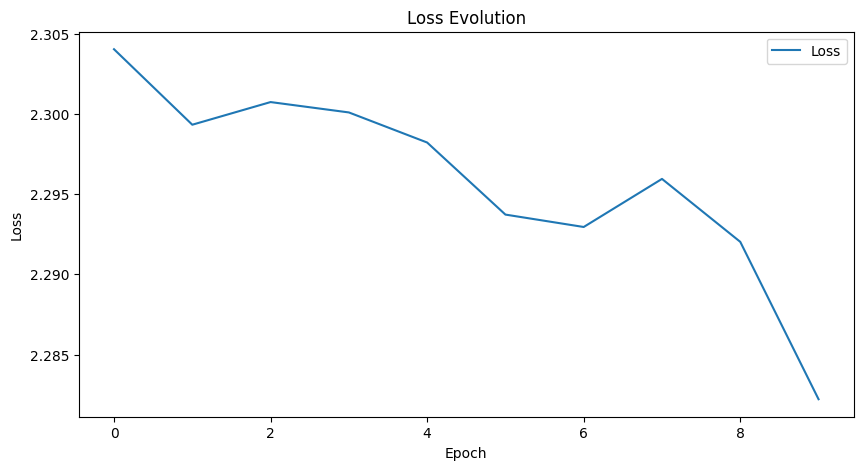

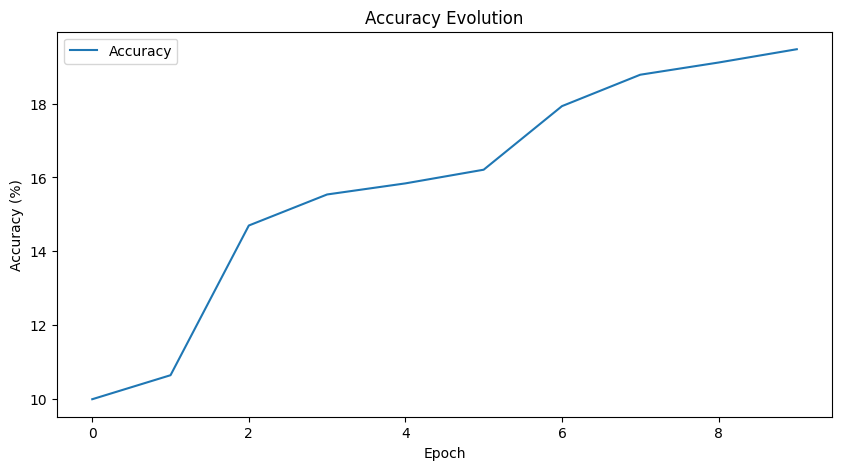

In [ ]:
# Cerinta 5 - completati codul aici


def plot_loss(loss_values):
    plt.figure(figsize=(10, 5))
    plt.plot(loss_values, label='Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss Evolution')
    plt.legend()
    plt.show()

def plot_accuracy(accuracy_values):
    plt.figure(figsize=(10, 5))
    plt.plot(accuracy_values, label='Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.title('Accuracy Evolution')
    plt.legend()
    plt.show()

def plotting_train_fn(epochs: int, train_loader: data.DataLoader, test_loader: data.DataLoader,
             net: nn.Module, loss_fn: nn.Module, optimizer: optim.Optimizer):
  loss_values = []
  accuracy_values = []
  for e in range(epochs):
    for images, labels in train_loader:
      optimizer.zero_grad()
      out = net(images)
      loss = loss_fn(out, labels)
      loss.backward()
      optimizer.step()


    print("Loss-ul la finalul epocii {} are valoarea {}".format(e, loss.item()))

    count = len(test_loader)
    correct = 0

    for test_image, test_label in test_loader:
      out_class = torch.argmax(net(test_image))
      if out_class == test_label:
        correct += 1

    print("Acuratetea la finalul epocii {} este {:.2f}%".format(e, (correct / count) * 100))
    loss_values.append(loss.item())
    accuracy_values.append((correct / count) * 100)

  plot_loss(loss_values)
  plot_accuracy(accuracy_values)

layer_sizes = [(3072, 1000), (1000, 50), (50, 10)]
multiLayer = Net(layer_sizes, nn.Sigmoid())
optimizer3 = optim.SGD(multiLayer.parameters(), lr=0.01)
optimizer3.zero_grad()
loss_fn = nn.CrossEntropyLoss()
plotting_train_fn(10, train_loader, test_loader, multiLayer, loss_fn, optimizer3)

